In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DMD PhoneCall

In [ ]:
import os
import shutil
from PIL import Image

def pad_frames_to_multiple_of_12(frames, target_dir):
    """12배수보다 4프레임 이하로 부족하면 마지막 프레임을 복사해서 12배수로 맞춤"""
    num_frames = len(frames)
    remainder = num_frames % 12

    if remainder > 0 and (12 - remainder) <= 4:  # (12 - remainder)가 4 이하일 때만 패딩
        last_frame = frames[-1]
        for _ in range(12 - remainder):
            new_frame_path = os.path.join(target_dir, f"frame_{num_frames}.jpg")
            shutil.copy(last_frame, new_frame_path)
            num_frames += 1

def process_video_folders(base_dir, output_dir):
    """영상 폴더 내 프레임을 12배수 단위로 분할하고, 부족한 경우 보정"""

    drop_frames = 0

    # 모든 영상 폴더를 순회
    for video_folder in os.listdir(base_dir):
        video_path = os.path.join(base_dir, video_folder)

        if not os.path.isdir(video_path):
            continue  # 폴더가 아닐 경우 스킵

        frames = sorted([os.path.join(video_path, f) for f in os.listdir(video_path) if f.endswith('.jpg')])

        if len(frames) < 8:  # 0~7개 프레임만 있는 폴더는 제외
            print(f"Skipping {video_folder} (only {len(frames)} frames)")
            continue

        num_frames = len(frames)
        num_subfolders = num_frames // 12  # 12배수로 자를 수 있는 그룹 개수
        remainder = num_frames % 12  # 나머지 프레임 수

        # 새로운 폴더 생성 및 프레임 복사
        for i in range(num_subfolders):
            subfolder_path = os.path.join(output_dir, f"{video_folder}_part{i+1}")
            os.makedirs(subfolder_path, exist_ok=True)

            start_idx = i * 12
            end_idx = start_idx + 12
            for frame_path in frames[start_idx:end_idx]:
                shutil.copy(frame_path, subfolder_path)

        # 나머지 프레임 처리
        if remainder > 0:
            last_frames = frames[-remainder:]  # 남은 프레임
            if (12 - remainder) <= 4:  # 4개 이하 부족하면 마지막 프레임 복사해서 12배수로 맞추기
                last_part_path = os.path.join(output_dir, f"{video_folder}_part{num_subfolders+1}")
                os.makedirs(last_part_path, exist_ok=True)

                # 남은 프레임을 새 폴더에 먼저 복사
                for frame_path in last_frames:
                    shutil.copy(frame_path, last_part_path)

                pad_frames_to_multiple_of_12(last_frames, last_part_path)  # 마지막 프레임 복사해서 채우기
            elif (12 - remainder) > 4:
                print(f"Dropping {remainder} frames from {video_folder}")  # 4프레임 초과하면 삭제
                drop_frames += remainder

        print(f"Processed {video_folder}: {num_subfolders} folders created.")

    print("----Complete----")
    print(f"total dropped frames count = {drop_frames}")

In [ ]:
# 실행 경로 설정
base_directory = "/content/drive/MyDrive/DMS/data/DMD/dmd_frames"  # 원본 프레임 폴더들이 있는 경로
output_directory = "/content/drive/MyDrive/DMS/data/DMD/dmd_frames_12x"  # 정리된 프레임이 저장될 경로

process_video_folders(os.path.join(base_directory, 'PhoneCall'), os.path.join(output_directory, 'PhoneCall'))

Dropping 2 frames from gB-6(File6)_s4_face_2019-03-20-13;42;00_6_2.avi
Processed gB-6(File6)_s4_face_2019-03-20-13;42;00_6_2.avi: 8 folders created.
Dropping 1 frames from gE-28(File18)_s4_face_2019-03-21-10;19;50_28_2.avi
Processed gE-28(File18)_s4_face_2019-03-21-10;19;50_28_2.avi: 13 folders created.
Dropping 4 frames from gZ-36(File30)_s4_face_2019-04-03-15;01;29_36_4.avi
Processed gZ-36(File30)_s4_face_2019-04-03-15;01;29_36_4.avi: 1 folders created.
Dropping 5 frames from gE-28(File18)_s4_face_2019-03-21-10;19;50_28_1.avi
Processed gE-28(File18)_s4_face_2019-03-21-10;19;50_28_1.avi: 2 folders created.
Dropping 7 frames from gE-28(File18)_s4_face_2019-03-21-10;19;50_28_3.avi
Processed gE-28(File18)_s4_face_2019-03-21-10;19;50_28_3.avi: 1 folders created.
Dropping 1 frames from gE-28(File18)_s4_face_2019-03-21-10;19;50_28_0.avi
Processed gE-28(File18)_s4_face_2019-03-21-10;19;50_28_0.avi: 16 folders created.
Processed gE-28(File18)_s2_face_2019-03-15-10;12;30_28_0.avi: 21 folders c

# YawDD

In [2]:
import os
import shutil
from PIL import Image

def pad_frames_to_multiple_of_12(frames, target_dir):
    """12배수보다 4프레임 이하로 부족하면 마지막 프레임을 복사해서 12배수로 맞춤"""
    num_frames = len(frames)
    remainder = num_frames % 12

    if remainder > 0 and (12 - remainder) <= 4:  # (12 - remainder)가 4 이하일 때만 패딩
        last_frame = frames[-1]
        for _ in range(12 - remainder):
            new_frame_path = os.path.join(target_dir, f"frame_{num_frames}.jpg")
            shutil.copy(last_frame, new_frame_path)
            num_frames += 1

def process_video_folders(base_dir, output_dir, camera):
    """영상 폴더 내 프레임을 12배수 단위로 분할하고, 부족한 경우 보정"""

    drop_frames = 0

    # 모든 영상 폴더를 순회
    for video_folder in os.listdir(base_dir):
        video_path = os.path.join(base_dir, video_folder)

        if not os.path.isdir(video_path):
            continue  # 폴더가 아닐 경우 스킵

        frames = sorted([os.path.join(video_path, f) for f in os.listdir(video_path) if f.endswith('.jpg')])

        if len(frames) < 8:  # 0~7개 프레임만 있는 폴더는 제외
            print(f"Skipping {video_folder} (only {len(frames)} frames)")
            drop_frames += len(frames)
            continue

        num_frames = len(frames)
        num_subfolders = num_frames // 12  # 12배수로 자를 수 있는 그룹 개수
        remainder = num_frames % 12  # 나머지 프레임 수

        # 새로운 폴더 생성 및 프레임 복사
        for i in range(num_subfolders):
            subfolder_path = os.path.join(output_dir, f"{camera}{video_folder}_part{i+1}")
            os.makedirs(subfolder_path, exist_ok=True)

            start_idx = i * 12
            end_idx = start_idx + 12
            for frame_path in frames[start_idx:end_idx]:
                shutil.copy(frame_path, subfolder_path)

        # 나머지 프레임 처리
        if remainder > 0:
            last_frames = frames[-remainder:]  # 남은 프레임
            if (12 - remainder) <= 4:  # 4개 이하 부족하면 마지막 프레임 복사해서 12배수로 맞추기
                last_part_path = os.path.join(output_dir, f"{camera}{video_folder}_part{num_subfolders+1}")
                os.makedirs(last_part_path, exist_ok=True)

                # 남은 프레임을 새 폴더에 먼저 복사
                for frame_path in last_frames:
                    shutil.copy(frame_path, last_part_path)

                pad_frames_to_multiple_of_12(last_frames, last_part_path)  # 마지막 프레임 복사해서 채우기
            elif (12 - remainder) > 4:
                print(f"Dropping {remainder} frames from {video_folder}")  # 4프레임 초과하면 삭제
                drop_frames += remainder

        print(f"Processed {video_folder}: {num_subfolders} folders created.")

    print("----Complete----")
    print(f"total dropped frames count = {drop_frames}")

In [3]:
base_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/YawDD_adjusted_frames/dash_female_split_output_adjusted"  # 원본 프레임 폴더들이 있는 경로
output_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted"  # 정리된 프레임이 저장될 경로

process_video_folders(os.path.join(base_directory, 'Yawning'), os.path.join(output_directory, 'Yawning'), 'dash')

Processed 1-FemaleNoGlasses-clip-0: 4 folders created.
Processed 1-FemaleNoGlasses-clip-1: 4 folders created.
Processed 2-FemaleNoGlasses-clip-1: 3 folders created.
Dropping 6 frames from 2-FemaleNoGlasses-clip-0
Processed 2-FemaleNoGlasses-clip-0: 1 folders created.
Dropping 6 frames from 3-FemaleGlasses-clip-0
Processed 3-FemaleGlasses-clip-0: 2 folders created.
Dropping 6 frames from 3-FemaleGlasses-clip-1
Processed 3-FemaleGlasses-clip-1: 3 folders created.
Dropping 6 frames from 5-FemaleNoGlasses-clip-0
Processed 5-FemaleNoGlasses-clip-0: 1 folders created.
Processed 3-FemaleGlasses-clip-2: 3 folders created.
Dropping 6 frames from 4-FemaleNoGlasses-clip-0
Processed 4-FemaleNoGlasses-clip-0: 1 folders created.
Dropping 6 frames from 5-FemaleNoGlasses-clip-1
Processed 5-FemaleNoGlasses-clip-1: 2 folders created.
Dropping 6 frames from 6-FemaleNoGlasses-clip-0
Processed 6-FemaleNoGlasses-clip-0: 2 folders created.
Processed 7-FemaleNoGlasses-clip-0: 2 folders created.
Processed 7-Fe

In [4]:
base_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/YawDD_adjusted_frames/dash_male_split_output_adjusted"  # 원본 프레임 폴더들이 있는 경로
output_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted"  # 정리된 프레임이 저장될 경로

process_video_folders(os.path.join(base_directory, 'Yawning'), os.path.join(output_directory, 'Yawning'), 'dash')

Processed 1-MaleGlasses-clip-0: 3 folders created.
Processed 2-MaleGlasses-clip-0: 3 folders created.
Processed 1-MaleGlasses-clip-1: 3 folders created.
Processed 2-MaleGlasses-clip-1: 3 folders created.
Dropping 6 frames from 3-MaleGlasses-clip-0
Processed 3-MaleGlasses-clip-0: 2 folders created.
Processed 3-MaleGlasses-clip-1: 2 folders created.
Dropping 6 frames from 4-MaleNoGlasses-clip-0
Processed 4-MaleNoGlasses-clip-0: 1 folders created.
Dropping 6 frames from 5-MaleGlasses-clip-0
Processed 5-MaleGlasses-clip-0: 1 folders created.
Dropping 6 frames from 5-MaleGlasses-clip-1
Processed 5-MaleGlasses-clip-1: 1 folders created.
Dropping 6 frames from 4-MaleNoGlasses-clip-1
Processed 4-MaleNoGlasses-clip-1: 3 folders created.
Processed 6-MaleGlasses-clip-0: 2 folders created.
Processed 6-MaleGlasses-clip-1: 2 folders created.
Processed 8-MaleNoGlasses-clip-0: 2 folders created.
Dropping 6 frames from 7-MaleGlasses-clip-0
Processed 7-MaleGlasses-clip-0: 2 folders created.
Dropping 6 f

In [5]:
base_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/YawDD_adjusted_frames/mirror_female_split_output_adjusted"  # 원본 프레임 폴더들이 있는 경로
output_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted"  # 정리된 프레임이 저장될 경로

process_video_folders(os.path.join(base_directory, 'Normal'), os.path.join(output_directory, 'Normal'), 'mirror')

Processed 1-FemaleNoGlasses-Yawning-clip-1: 2 folders created.
Dropping 6 frames from 2-FemaleNoGlasses-Yawning-clip-0
Processed 2-FemaleNoGlasses-Yawning-clip-0: 4 folders created.
Processed 2-FemaleNoGlasses-Yawning-clip-2: 1 folders created.
Dropping 3 frames from 3-FemaleGlasses-Yawning-clip-1
Processed 3-FemaleGlasses-Yawning-clip-1: 2 folders created.
Dropping 2 frames from 4-FemaleGlasses-Yawning-clip-3
Processed 4-FemaleGlasses-Yawning-clip-3: 1 folders created.
Processed 5-FemaleGlasses-Yawning-clip-2: 2 folders created.
Processed 7-FemaleGlasses-Yawning-clip-1: 2 folders created.
Dropping 6 frames from 8-FemaleGlasses-Yawning-clip-1
Processed 8-FemaleGlasses-Yawning-clip-1: 1 folders created.
Dropping 7 frames from 6-FemaleNoGlasses-Yawning-clip-1
Processed 6-FemaleNoGlasses-Yawning-clip-1: 1 folders created.
Dropping 3 frames from 10-FemaleNoGlasses-Yawning-clip-2
Processed 10-FemaleNoGlasses-Yawning-clip-2: 1 folders created.
Dropping 7 frames from 11-FemaleNoGlasses-Yawnin

In [6]:
# 실행 경로 설정
base_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/YawDD_adjusted_frames/mirror_female_split_output_adjusted"  # 원본 프레임 폴더들이 있는 경로
output_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted"  # 정리된 프레임이 저장될 경로

process_video_folders(os.path.join(base_directory, 'Yawning'), os.path.join(output_directory, 'Yawning'), 'mirror')

Dropping 6 frames from 1-FemaleNoGlasses-Yawning-clip-0
Processed 1-FemaleNoGlasses-Yawning-clip-0: 3 folders created.
Dropping 6 frames from 4-FemaleGlasses-Yawning-clip-0
Processed 4-FemaleGlasses-Yawning-clip-0: 3 folders created.
Dropping 6 frames from 2-FemaleNoGlasses-Yawning-clip-1
Processed 2-FemaleNoGlasses-Yawning-clip-1: 3 folders created.
Processed 3-FemaleGlasses-Yawning-clip-0: 3 folders created.
Processed 5-FemaleGlasses-Yawning-clip-0: 3 folders created.
Processed 4-FemaleGlasses-Yawning-clip-2: 4 folders created.
Dropping 6 frames from 6-FemaleNoGlasses-Yawning-clip-0
Processed 6-FemaleNoGlasses-Yawning-clip-0: 5 folders created.
Dropping 6 frames from 5-FemaleGlasses-Yawning-clip-1
Processed 5-FemaleGlasses-Yawning-clip-1: 3 folders created.
Processed 7-FemaleGlasses-Yawning-clip-0: 3 folders created.
Processed 8-FemaleGlasses-Yawning-clip-0: 3 folders created.
Processed 9-FemaleNoGlasses-Yawning-clip-0: 1 folders created.
Dropping 6 frames from 11-FemaleNoGlasses-Yaw

In [7]:
# 실행 경로 설정
base_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/YawDD_adjusted_frames/mirror_male_split_output_adjusted"  # 원본 프레임 폴더들이 있는 경로
output_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted"  # 정리된 프레임이 저장될 경로

process_video_folders(os.path.join(base_directory, 'Normal'), os.path.join(output_directory, 'Normal'), 'mirror')

Dropping 6 frames from 1-MaleNoGlasses-Yawning-clip-0
Processed 1-MaleNoGlasses-Yawning-clip-0: 1 folders created.
Processed 1-MaleSunGlasses-Yawning-clip-0: 1 folders created.
Skipping 1-MaleSunGlasses-Yawning-clip-4 (only 1 frames)
Dropping 7 frames from 1-MaleNoGlasses-Yawning-clip-2
Processed 1-MaleNoGlasses-Yawning-clip-2: 2 folders created.
Skipping 1-MaleSunGlasses-Yawning-clip-2 (only 6 frames)
Processed 2-MaleGlasses-Yawning-clip-2: 0 folders created.
Processed 2-MaleGlasses-Yawning-clip-0: 1 folders created.
Dropping 5 frames from 3-MaleGlasses-Yawning-clip-0
Processed 3-MaleGlasses-Yawning-clip-0: 8 folders created.
Dropping 5 frames from 3-MaleGlasses-Yawning-clip-2
Processed 3-MaleGlasses-Yawning-clip-2: 4 folders created.
Dropping 6 frames from 3-MaleNoGlasses-Yawning-clip-2
Processed 3-MaleNoGlasses-Yawning-clip-2: 2 folders created.
Processed 4-MaleNoGlasses-Yawning-clip-1: 2 folders created.
Skipping 5-MaleNoGlasses-Yawning-clip-4 (only 4 frames)
Processed 5-MaleNoGlas

In [8]:
# 실행 경로 설정
base_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/YawDD_adjusted_frames/mirror_male_split_output_adjusted"  # 원본 프레임 폴더들이 있는 경로
output_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted"  # 정리된 프레임이 저장될 경로

process_video_folders(os.path.join(base_directory, 'Yawning'), os.path.join(output_directory, 'Yawning'), 'mirror')

Dropping 6 frames from 1-MaleSunGlasses-Yawning-clip-1
Processed 1-MaleSunGlasses-Yawning-clip-1: 1 folders created.
Processed 1-MaleSunGlasses-Yawning-clip-3: 2 folders created.
Processed 1-MaleNoGlasses-Yawning-clip-1: 2 folders created.
Processed 2-MaleGlasses-Yawning-clip-1: 4 folders created.
Processed 3-MaleGlasses-Yawning-clip-1: 3 folders created.
Dropping 6 frames from 3-MaleNoGlasses-Yawning-clip-0
Processed 3-MaleNoGlasses-Yawning-clip-0: 2 folders created.
Processed 4-MaleNoGlasses-Yawning-clip-0: 3 folders created.
Dropping 6 frames from 5-MaleNoGlasses-Yawning-clip-3
Processed 5-MaleNoGlasses-Yawning-clip-3: 2 folders created.
Processed 5-MaleNoGlasses-Yawning-clip-1: 2 folders created.
Dropping 6 frames from 6-MaleNoGlasses-Yawning-clip-0
Processed 6-MaleNoGlasses-Yawning-clip-0: 2 folders created.
Processed 7-MaleGlasses-Yawning-clip-1: 3 folders created.
Skipping 6-MaleNoGlasses-Yawning-clip-1 (only 6 frames)
Dropping 6 frames from 8-MaleGlassesBeard-Yawning-clip-1
Pro

---
# 검증

In [13]:
yaw_frames_12x_path = '/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted'

In [14]:
import os

def check_folders_for_12_images(base_dir):
    """각 폴더의 이미지 개수를 확인하고, 12개가 아닌 폴더 이름을 출력"""

    incorrect_folders = []  # 12개가 아닌 폴더를 저장할 리스트

    # 모든 폴더를 순회
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)

        if not os.path.isdir(folder_path):  # 폴더가 아닌 경우 스킵
            continue

        # 폴더 내 이미지 개수 확인
        image_count = len([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

        if image_count != 12:  # 이미지 개수가 12개가 아닌 경우 저장
            incorrect_folders.append((folder, image_count))

    # 결과 출력
    if incorrect_folders:
        print("📌 12개가 아닌 폴더 목록:")
        for folder, count in incorrect_folders:
            print(f"❌ {folder}: {count} images")
    else:
        print("✅ 모든 폴더가 12개의 이미지를 포함하고 있습니다.")

In [15]:
# 폴더 확인 실행
check_folders_for_12_images(os.path.join(yaw_frames_12x_path, 'Normal'))

✅ 모든 폴더가 12개의 이미지를 포함하고 있습니다.


In [16]:
# 폴더 확인 실행
check_folders_for_12_images(os.path.join(yaw_frames_12x_path, 'Yawning'))

✅ 모든 폴더가 12개의 이미지를 포함하고 있습니다.


-----
# 사람수 count

In [58]:
import os
import pandas as pd
import re

def extract_folder_info_to_df(base_dir, label):
    """폴더명을 분석하여 ID, 성별, 안경 여부, 행동 유형, 클립 번호, 파트 번호를 DataFrame으로 저장"""

    folder_info = []
    base_dir = os.path.join(base_dir, label)
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)

        if not os.path.isdir(folder_path):  # 폴더가 아닐 경우 스킵
            continue
        print(folder)
        # 정규식을 사용하여 패턴 매칭
        pattern = r"([a-zA-Z0-9]+)-([a-zA-Z]+(?:Glasses|NoGlasses))(-[-a-zA-Z&]+)?-clip-(\d+)_part(\d+)"

        match = re.match(pattern, folder)
        if not pattern:
            print(f"Skipping folder (incorrect format): {folder}")
            continue

        person_id, genderWithGlasses, clip, part = pattern.groups()

        if genderWithGlasses[0] == 'F':
          gender = 'Female'
        elif genderWithGlasses[0] == 'M':
          gender = 'Male'

        if 'NoGlasses' in genderWithGlasses:
          glasses = 'NoGlasses'
        elif 'SunGlasses' in genderWithGlasses:
          glasses = 'SunGlasses'
        else:
          glasses = 'Glasses'

        folder_info.append([person_id, gender, glasses, label, int(clip), int(part)])

    # DataFrame 생성
    df = pd.DataFrame(folder_info, columns=['ID', 'Gender', 'Glasses', 'Action', 'Clip', 'Part'])

    return df

In [60]:
# 실행할 폴더 경로
base_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted"

# 폴더 정보 분석 실행 및 DataFrame 저장
norm_df = extract_folder_info_to_df(base_directory, 'Normal')
yawn_df = extract_folder_info_to_df(base_directory, 'Yawning')

mirror1-FemaleNoGlasses-Yawning-clip-1_part1


AttributeError: 'str' object has no attribute 'groups'

In [50]:
norm_df['Glasses'].unique()

array(['NoGlasses', 'Glasses', 'SunGlasses'], dtype=object)

In [51]:
norm_df

,ID,Gender,Glasses,Action,Clip,Part
0,mirror1,Female,NoGlasses,Normal,1,1
1,mirror1,Female,NoGlasses,Normal,1,2
2,mirror1,Female,NoGlasses,Normal,1,3
3,mirror2,Female,NoGlasses,Normal,0,1
4,mirror2,Female,NoGlasses,Normal,0,2
...,...,...,...,...,...,...
289,mirror47,Male,NoGlasses,Normal,2,1
290,mirror47,Male,NoGlasses,Normal,2,2
291,mirror47,Male,NoGlasses,Normal,0,1
292,mirror47,Male,NoGlasses,Normal,0,2


In [ ]:
#
norm_df[norm_df['Gender'] == 'Female']['ID'].unique()

array(['mirror1', 'mirror2', 'mirror3', 'mirror4', 'mirror5', 'mirror6',
       'mirror8', 'mirror7', 'mirror10', 'mirror11', 'mirror13',
       'mirror14', 'mirror15', 'mirror16', 'mirror17', 'mirror18',
       'mirror19', 'mirror20', 'mirror21', 'mirror22', 'mirror23',
       'mirror24', 'mirror26', 'mirror27', 'mirror28', 'mirror29',
       'mirror30', 'mirror31', 'mirror34', 'mirror35', 'mirror36',
       'mirror37', 'mirror39', 'mirror40', 'mirror42', 'mirror41',
       'mirror43'], dtype=object)

In [ ]:
norm_df[norm_df['Gender'] == 'Male']['ID'].unique()

array(['mirror1', 'mirror2', 'mirror3', 'mirror5', 'mirror4', 'mirror7',
       'mirror9', 'mirror8', 'mirror10', 'mirror11', 'mirror13',
       'mirror15', 'mirror17', 'mirror18', 'mirror19', 'mirror20',
       'mirror21', 'mirror22', 'mirror23', 'mirror24', 'mirror25',
       'mirror26', 'mirror27', 'mirror28', 'mirror29', 'mirror30',
       'mirror31', 'mirror32', 'mirror33', 'mirror35', 'mirror34',
       'mirror36', 'mirror38', 'mirror37', 'mirror39', 'mirror40',
       'mirror41', 'mirror42', 'mirror43', 'mirror44', 'mirror45',
       'mirror46', 'mirror47'], dtype=object)

In [ ]:
norm_df[(norm_df['Gender'] == 'Female') & (norm_df['Glasses'] == 'SunGlasses')]['ID'].unique()

array(['mirror15', 'mirror18', 'mirror22', 'mirror26', 'mirror27',
       'mirror42'], dtype=object)

In [ ]:
norm_df[(norm_df['Gender'] == 'Female') & (norm_df['Glasses'] == 'Glasses')]['ID'].unique()

array(['mirror3', 'mirror4', 'mirror5', 'mirror8', 'mirror7', 'mirror15',
       'mirror16', 'mirror31', 'mirror41'], dtype=object)

In [ ]:
norm_df[(norm_df['Gender'] == 'Male') & (norm_df['Glasses'] == 'SunGlasses')]['ID'].unique()

array(['mirror1', 'mirror25', 'mirror36', 'mirror38'], dtype=object)

In [ ]:
norm_df[(norm_df['Gender'] == 'Male') & (norm_df['Glasses'] == 'Glasses')]['ID'].unique()

array(['mirror2', 'mirror3', 'mirror7', 'mirror8', 'mirror11', 'mirror13',
       'mirror19', 'mirror20', 'mirror21', 'mirror22', 'mirror23',
       'mirror24', 'mirror25', 'mirror27', 'mirror28', 'mirror30',
       'mirror31', 'mirror32', 'mirror33', 'mirror39', 'mirror46'],
      dtype=object)

In [71]:
def extract_folder_info_to_df(base_dir, label):
    """폴더명을 분석하여 ID, 성별, 안경 여부, 행동 유형, 클립 번호, 파트 번호를 DataFrame으로 저장"""

    folder_info = []

    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)

        if not os.path.isdir(folder_path):  # 폴더가 아닐 경우 스킵
            continue

        splits = folder.split("-")

        person_id = splits[0]
        genderWithGlasses = splits[1]

        if genderWithGlasses[0] == 'F':
          gender = 'Female'
        elif genderWithGlasses[0] == 'M':
          gender = 'Male'

        if 'NoGlasses' in genderWithGlasses:
          glasses = 'NoGlasses'
        elif 'SunGlasses' in genderWithGlasses:
          glasses = 'SunGlasses'
        else:
          glasses = 'Glasses'

        folder_info.append([person_id, gender, glasses])

    # DataFrame 생성
    df = pd.DataFrame(folder_info, columns=['ID', 'Gender', 'Glasses'])

    return df


# 실행할 폴더 경로
base_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted/Yawning"

# 폴더 정보 분석 실행 및 DataFrame 저장
yawn_df = extract_folder_info_to_df(base_directory, 'Yawning')

In [62]:
yawn_df[yawn_df['Gender'] == 'Female']['ID'].unique()

array(['dash1', 'dash2', 'dash3', 'dash5', 'dash4', 'dash6', 'dash7',
       'dash8', 'dash9', 'dash11', 'dash13', 'dash12', 'mirror1',
       'mirror4', 'mirror2', 'mirror3', 'mirror5', 'mirror6', 'mirror7',
       'mirror8', 'mirror9', 'mirror11', 'mirror10', 'mirror13',
       'mirror12', 'mirror14', 'mirror15', 'mirror16', 'mirror17',
       'mirror18', 'mirror19', 'mirror21', 'mirror20', 'mirror22',
       'mirror23', 'mirror24', 'mirror25', 'mirror26', 'mirror27',
       'mirror28', 'mirror29', 'mirror31', 'mirror30', 'mirror32',
       'mirror33', 'mirror34', 'mirror35', 'mirror37', 'mirror36',
       'mirror38', 'mirror39', 'mirror41', 'mirror43', 'mirror42'],
      dtype=object)

In [63]:
yawn_df[yawn_df['Gender'] == 'Male']['ID'].unique()

array(['dash1', 'dash2', 'dash3', 'dash4', 'dash5', 'dash6', 'dash8',
       'dash7', 'dash9', 'dash10', 'dash12', 'dash13', 'dash14', 'dash15',
       'dash16', 'mirror1', 'mirror2', 'mirror3', 'mirror4', 'mirror5',
       'mirror6', 'mirror7', 'mirror8', 'mirror9', 'mirror10', 'mirror11',
       'mirror12', 'mirror13', 'mirror17', 'mirror15', 'mirror18',
       'mirror19', 'mirror20', 'mirror21', 'mirror22', 'mirror23',
       'mirror24', 'mirror25', 'mirror26', 'mirror27', 'mirror28',
       'mirror29', 'mirror30', 'mirror31', 'mirror32', 'mirror33',
       'mirror34', 'mirror36', 'mirror35', 'mirror38', 'mirror37',
       'mirror39', 'mirror40', 'mirror41', 'mirror42', 'mirror44',
       'mirror43', 'mirror45', 'mirror46', 'mirror47'], dtype=object)

In [64]:
yawn_df[(yawn_df['Gender'] == 'Female') & (yawn_df['Glasses'] == 'NoGlasses')]['ID'].unique()

array(['dash1', 'dash2', 'dash5', 'dash4', 'dash6', 'dash7', 'dash9',
       'mirror1', 'mirror2', 'mirror6', 'mirror9', 'mirror11', 'mirror10',
       'mirror13', 'mirror12', 'mirror14', 'mirror17', 'mirror18',
       'mirror19', 'mirror21', 'mirror20', 'mirror22', 'mirror23',
       'mirror24', 'mirror25', 'mirror27', 'mirror28', 'mirror29',
       'mirror30', 'mirror31', 'mirror33', 'mirror34', 'mirror35',
       'mirror37', 'mirror36', 'mirror38', 'mirror39', 'mirror43'],
      dtype=object)

In [65]:
yawn_df[(yawn_df['Gender'] == 'Female') & (yawn_df['Glasses'] == 'SunGlasses')]['ID'].unique()

array(['mirror15', 'mirror17', 'mirror18', 'mirror22', 'mirror25',
       'mirror26', 'mirror27', 'mirror32', 'mirror42'], dtype=object)

In [66]:
yawn_df[(yawn_df['Gender'] == 'Female') & (yawn_df['Glasses'] == 'Glasses')]['ID'].unique()

array(['dash3', 'dash8', 'dash11', 'dash13', 'dash12', 'mirror4',
       'mirror3', 'mirror5', 'mirror7', 'mirror8', 'mirror15', 'mirror16',
       'mirror26', 'mirror31', 'mirror41'], dtype=object)

In [67]:
yawn_df[(yawn_df['Gender'] == 'Male') & (yawn_df['Glasses'] == 'SunGlasses')]['ID'].unique()

array(['mirror1', 'mirror25', 'mirror36', 'mirror38'], dtype=object)

In [68]:
yawn_df[(yawn_df['Gender'] == 'Male') & (yawn_df['Glasses'] == 'Glasses')]['ID'].unique()

array(['dash1', 'dash2', 'dash3', 'dash5', 'dash6', 'dash7', 'dash10',
       'dash12', 'dash15', 'mirror2', 'mirror3', 'mirror7', 'mirror8',
       'mirror11', 'mirror12', 'mirror13', 'mirror19', 'mirror20',
       'mirror21', 'mirror22', 'mirror23', 'mirror24', 'mirror25',
       'mirror27', 'mirror28', 'mirror30', 'mirror31', 'mirror32',
       'mirror33', 'mirror39', 'mirror46'], dtype=object)

In [69]:
yawn_df[['ID', 'Gender']].drop_duplicates()

,ID,Gender
0,dash1,Female
8,dash2,Female
12,dash3,Female
17,dash5,Female
21,dash4,Female
...,...,...
453,mirror44,Male
456,mirror43,Male
457,mirror45,Male
463,mirror46,Male


In [72]:

# 실행할 폴더 경로
base_directory = "/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x_adjusted/Normal"

# 폴더 정보 분석 실행 및 DataFrame 저장
norm_df = extract_folder_info_to_df(base_directory, 'Normal')

In [73]:
norm_df[['ID', 'Gender']].drop_duplicates()

,ID,Gender
0,mirror1,Female
3,mirror2,Female
8,mirror3,Female
10,mirror4,Female
11,mirror5,Female
...,...,...
282,mirror43,Male
292,mirror45,Male
294,mirror44,Male
297,mirror46,Male


In [88]:
norm_df['Label']="Normal"
yawn_df['Label']="Yawning"

In [89]:
total_df = pd.concat([norm_df, yawn_df], axis=0).reset_index(drop=True)

In [90]:
total_df['CameraAngle'] = ['dash' if id[:4] == 'dash' else 'mirror' for id in total_df['ID']]
total_df

,ID,Gender,Glasses,Label,CameraAngle
0,mirror1,Female,NoGlasses,Normal,mirror
1,mirror1,Female,NoGlasses,Normal,mirror
2,mirror1,Female,NoGlasses,Normal,mirror
3,mirror2,Female,NoGlasses,Normal,mirror
4,mirror2,Female,NoGlasses,Normal,mirror
...,...,...,...,...,...
771,mirror46,Male,Glasses,Yawning,mirror
772,mirror46,Male,Glasses,Yawning,mirror
773,mirror46,Male,Glasses,Yawning,mirror
774,mirror47,Male,NoGlasses,Yawning,mirror


In [99]:
info = total_df[['ID', 'Gender', 'CameraAngle']].drop_duplicates()
info

,ID,Gender,CameraAngle
0,mirror1,Female,mirror
3,mirror2,Female,mirror
8,mirror3,Female,mirror
10,mirror4,Female,mirror
11,mirror5,Female,mirror
...,...,...,...
620,mirror10,Male,mirror
627,mirror12,Male,mirror
630,mirror13,Male,mirror
638,mirror15,Male,mirror


In [116]:
unique_df = total_df[['ID', 'Gender', 'Glasses', 'Label', 'CameraAngle']].drop_duplicates()
unique_df

,ID,Gender,Glasses,Label,CameraAngle
0,mirror1,Female,NoGlasses,Normal,mirror
3,mirror2,Female,NoGlasses,Normal,mirror
8,mirror3,Female,Glasses,Normal,mirror
10,mirror4,Female,Glasses,Normal,mirror
11,mirror5,Female,Glasses,Normal,mirror
...,...,...,...,...,...
761,mirror44,Male,NoGlasses,Yawning,mirror
764,mirror43,Male,NoGlasses,Yawning,mirror
765,mirror45,Male,NoGlasses,Yawning,mirror
771,mirror46,Male,Glasses,Yawning,mirror


In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def count_plot(data, col, title):
    plt.figure(figsize=(5, 4))
    sns.countplot(x=col, data=data)
    plt.yticks(np.arange(0, 701, 100))
    plt.xlabel('')
    plt.title(title)
    plt.show()

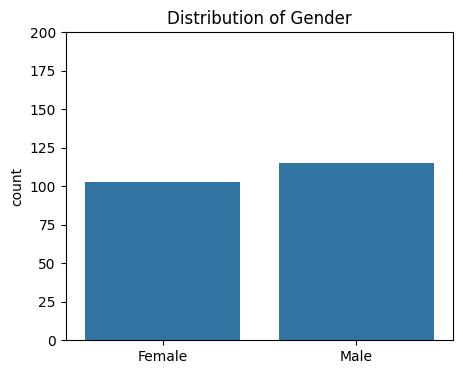

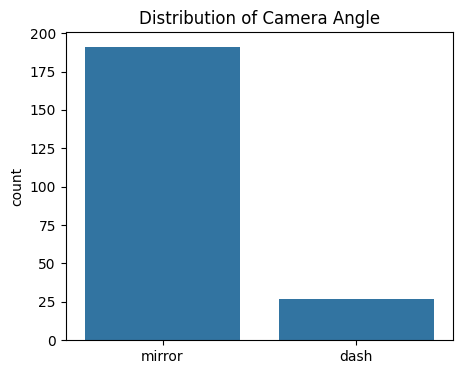

In [132]:
count_plot(unique_df, 'Gender', 'Distribution of Gender')
count_plot(unique_df, 'CameraAngle', 'Distribution of Camera Angle')
count_plot(unique_df, 'Label', 'Distribution of Label')
count_plot(unique_df, 'Glasses', 'Distribution of Glasses')

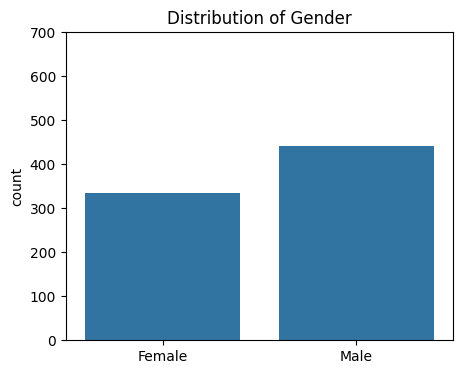

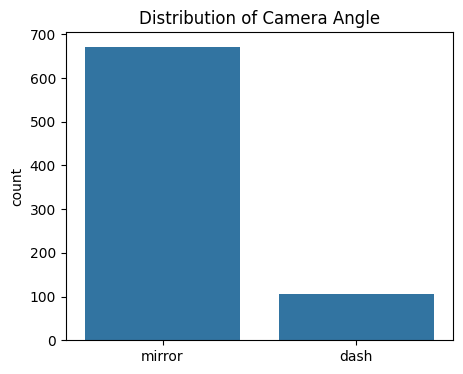

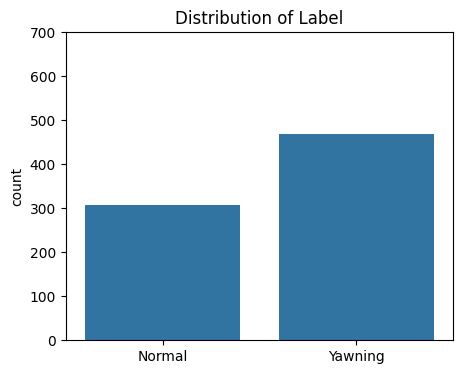

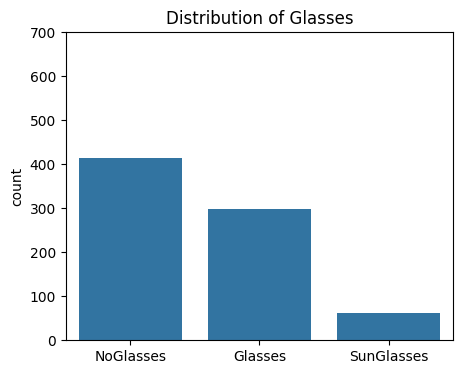

In [142]:
count_plot(total_df, 'Gender', 'Distribution of Gender')
count_plot(total_df, 'CameraAngle', 'Distribution of Camera Angle')
count_plot(total_df, 'Label', 'Distribution of Label')
count_plot(total_df, 'Glasses', 'Distribution of Glasses')

In [146]:
total_df.groupby(['Label', 'CameraAngle']).count()#.reset_index()

ID  Gender  Glasses
Label   CameraAngle                      
Normal  mirror       308     308      308
Yawning dash         105     105      105
        mirror       363     363      363

In [147]:
# ID와 Gender 조합을 튜플로 변환하여 set()에 저장
unique_yawn = set(yawn_df[['ID', 'Gender']].apply(tuple, axis=1))
unique_norm = set(norm_df[['ID', 'Gender']].apply(tuple, axis=1))

In [148]:
# yawn_df에만 있는 ID-Gender 조합
only_in_yawn = unique_yawn - unique_norm
only_in_yawn

{('dash1', 'Female'),
 ('dash1', 'Male'),
 ('dash10', 'Male'),
 ('dash11', 'Female'),
 ('dash12', 'Female'),
 ('dash12', 'Male'),
 ('dash13', 'Female'),
 ('dash13', 'Male'),
 ('dash14', 'Male'),
 ('dash15', 'Male'),
 ('dash16', 'Male'),
 ('dash2', 'Female'),
 ('dash2', 'Male'),
 ('dash3', 'Female'),
 ('dash3', 'Male'),
 ('dash4', 'Female'),
 ('dash4', 'Male'),
 ('dash5', 'Female'),
 ('dash5', 'Male'),
 ('dash6', 'Female'),
 ('dash6', 'Male'),
 ('dash7', 'Female'),
 ('dash7', 'Male'),
 ('dash8', 'Female'),
 ('dash8', 'Male'),
 ('dash9', 'Female'),
 ('dash9', 'Male'),
 ('mirror10', 'Male'),
 ('mirror12', 'Female'),
 ('mirror12', 'Male'),
 ('mirror13', 'Male'),
 ('mirror15', 'Male'),
 ('mirror22', 'Male'),
 ('mirror25', 'Female'),
 ('mirror32', 'Female'),
 ('mirror33', 'Female'),
 ('mirror38', 'Female'),
 ('mirror6', 'Male'),
 ('mirror9', 'Female')}

In [149]:
# 정상 운전 데이터만 있는 사람
only_in_norm = unique_norm - unique_yawn
only_in_norm

{('mirror40', 'Female')}

In [150]:
combined_unique = unique_yawn | unique_norm
print(combined_unique)
print(len(combined_unique))

{('mirror13', 'Female'), ('dash5', 'Male'), ('mirror23', 'Female'), ('dash7', 'Male'), ('mirror17', 'Female'), ('mirror34', 'Female'), ('dash11', 'Female'), ('dash4', 'Female'), ('dash9', 'Male'), ('mirror37', 'Male'), ('mirror29', 'Female'), ('dash10', 'Male'), ('dash1', 'Male'), ('mirror41', 'Male'), ('mirror35', 'Male'), ('dash6', 'Male'), ('dash5', 'Female'), ('mirror39', 'Male'), ('dash7', 'Female'), ('dash16', 'Male'), ('dash9', 'Female'), ('mirror37', 'Female'), ('mirror6', 'Male'), ('mirror27', 'Male'), ('mirror20', 'Male'), ('mirror11', 'Female'), ('dash1', 'Female'), ('mirror1', 'Female'), ('mirror41', 'Female'), ('mirror35', 'Female'), ('mirror42', 'Male'), ('mirror28', 'Male'), ('dash6', 'Female'), ('mirror39', 'Female'), ('mirror38', 'Male'), ('mirror46', 'Male'), ('mirror45', 'Male'), ('mirror24', 'Male'), ('mirror16', 'Female'), ('mirror43', 'Male'), ('mirror2', 'Male'), ('mirror5', 'Male'), ('mirror6', 'Female'), ('mirror3', 'Male'), ('mirror27', 'Female'), ('mirror20',